In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn import set_config
set_config(transform_output="pandas")

warnings.filterwarnings("ignore", category=UserWarning)

# Dataset Reading

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Data Preproccessing

In [10]:
df.duplicated().sum()

0

<h5>No duplicates</h5>

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df.isnull().any(axis=1).sum()

708

<h5>Unneeded columuns</h5>

In [13]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

<h5>Cabin has too many missing values</h5>

In [14]:
df.drop(["Cabin"],axis=1,inplace=True)

In [15]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<h5>Shuffle rows</h5>

In [16]:
df=df.iloc[np.random.permutation(len(df))]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
689,1,1,female,15.0,0,1,211.3375,S
765,1,1,female,51.0,1,0,77.9583,S
201,0,3,male,NaN,8,2,69.5500,S
779,1,1,female,43.0,0,1,211.3375,S
511,0,3,male,NaN,0,0,8.0500,S


<h5>Train-Test split</h5>

In [17]:
from sklearn.model_selection import train_test_split

X=df.drop("Survived",axis=1)
y=df["Survived"]
X_train,X_test,y_train,y_test=train_test_split(X,y,
    test_size=0.2,random_state=42)

In [18]:
X_train['Embarked'].value_counts()

S    516
C    137
Q     58
Name: Embarked, dtype: int64

<h5>Fill null 'Embarked' Values with Mode (S)</h5>

In [19]:
X_train['Embarked'].fillna(value=X_train['Embarked'].mode()[0],inplace=True)
X_test['Embarked'].fillna(value=X_train['Embarked'].mode()[0],inplace=True)

<h5>Splitting columns into numerical and categorical columns</h5>

In [20]:
train_set_obj=X_train.select_dtypes(include=['object'])
train_set_num=X_train.select_dtypes(include=np.number)

test_set_obj=X_test.select_dtypes(include=['object'])
test_set_num=X_test.select_dtypes(include=np.number)

In [21]:
train_set_num.head()

,Pclass,Age,SibSp,Parch,Fare
540,1,36.0,0,2,71.00
224,1,38.0,1,0,90.00
235,3,NaN,0,0,7.55
781,1,17.0,1,0,57.00
327,2,36.0,0,0,13.00


In [22]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="median")
imputer.fit(train_set_num)
imputer.statistics_

array([ 3.    , 29.    ,  0.    ,  0.    , 14.4542])

In [23]:
print("Before")
print("train_set_num sum of null values: ",train_set_num.isnull().sum().sum())
print("test_set_num sum of null values: ",test_set_num.isnull().sum().sum())
print("**********************")

train_set_num=pd.DataFrame(imputer.transform(train_set_num))
test_set_num=pd.DataFrame(imputer.transform(test_set_num))

print("**********************")
print("After")
print("train_set_num sum of null values: ",train_set_num.isnull().sum().sum())
print("test_set_num sum of null values: ",test_set_num.isnull().sum().sum())

Before
train_set_num sum of null values:  149
test_set_num sum of null values:  28
**********************
**********************
After
train_set_num sum of null values:  0
test_set_num sum of null values:  0


In [24]:
from sklearn.ensemble import IsolationForest

isolation_forest=IsolationForest(random_state=42)

outlier_pred= isolation_forest.fit(train_set_num)

train_outliers=isolation_forest.predict(train_set_num)
test_outliers=isolation_forest.predict(test_set_num)

print("Ratio of outliers in train_set : ",(train_outliers==-1).sum()/len(train_outliers))

Ratio of outliers in train_set :  0.24719101123595505


<h5>Remove oultiers</h5>

In [25]:
train_set_num=train_set_num.iloc[train_outliers==1]
test_set_num=test_set_num.iloc[test_outliers==1]

<h5>Draw histograms</h5>

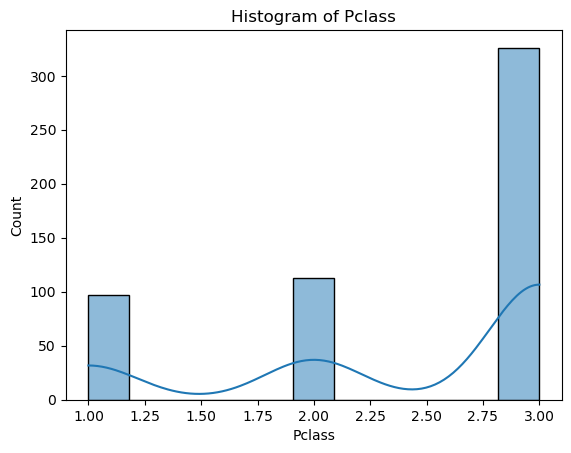

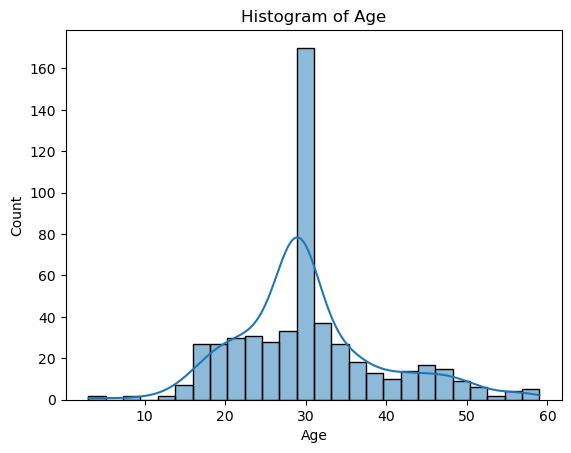

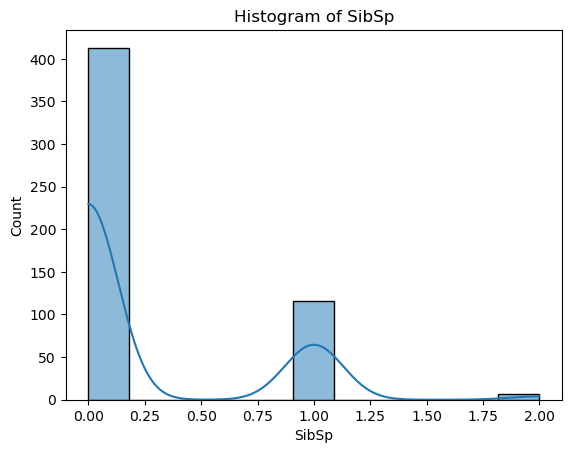

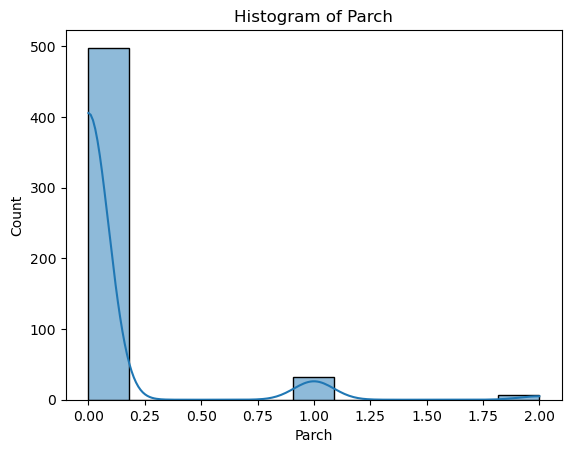

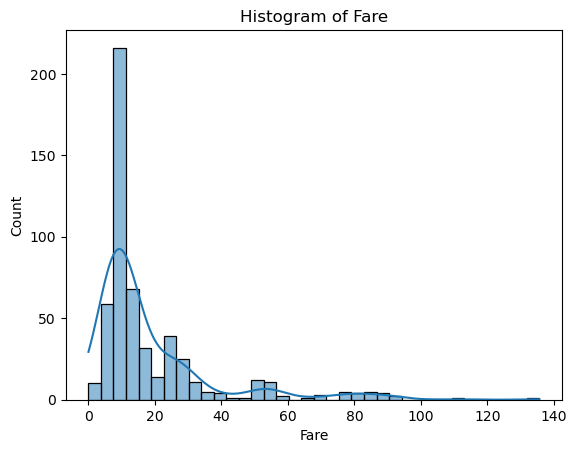

In [26]:
for column in train_set_num.columns:
    sns.histplot(data=train_set_num, x=column, kde=True)
    plt.title(f"Histogram of {column}")
    plt.show()

<h5>No Normal distribution => MinMaxScaler</h5>

In [27]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler= MinMaxScaler(feature_range=(0,1))
mm_scaler=mm_scaler.fit(train_set_num)

train_set_num=mm_scaler.transform(train_set_num)
test_set_num=mm_scaler.transform(test_set_num)

In [28]:
test_set_obj.head()

,Sex,Embarked
806,male,S
755,male,S
555,male,S
785,male,S
680,female,Q


<h5>For 'Sex' and 'Embarked', it is better to use OneHotEncoder, as order doesn't have a meaning here</h5>

In [29]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False)

onehot_encoder = onehot_encoder.fit(train_set_obj)

train_set_obj = onehot_encoder.transform(train_set_obj)
test_set_obj = onehot_encoder.transform(test_set_obj)

In [30]:
train_set_obj.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
540,1.0,0.0,0.0,0.0,1.0
224,0.0,1.0,0.0,0.0,1.0
235,1.0,0.0,0.0,0.0,1.0
781,1.0,0.0,0.0,0.0,1.0
327,1.0,0.0,0.0,0.0,1.0


<h5>Merge numerical columns and categorical columns</h5>

In [31]:
X_train=pd.merge(train_set_num, train_set_obj, left_index=True, right_index=True)
X_test=pd.merge(test_set_num, test_set_obj, left_index=True, right_index=True)

In [32]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
224,0.0,0.625000,0.5,0.0,0.663554,0.0,1.0,0.0,0.0,1.0
235,1.0,0.464286,0.0,0.0,0.055665,1.0,0.0,0.0,0.0,1.0
327,0.5,0.589286,0.0,0.0,0.095847,1.0,0.0,0.0,0.0,1.0
495,1.0,0.464286,0.0,0.0,0.106598,0.0,1.0,1.0,0.0,0.0
47,1.0,0.464286,0.0,0.0,0.057139,1.0,0.0,0.0,1.0,0.0


In [33]:
y_train=y_train.loc[X_train.index]
y_test=y_test.loc[X_test.index]

# SGD Classifier

In [34]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [35]:
def CrossValPRF(st_kf,clf):
    print("Precision: ",np.average(cross_val_score(clf, X_test, y_test, cv=st_kf, scoring="precision")))
    print("Recall: ",np.average(cross_val_score(clf, X_test, y_test, cv=st_kf, scoring="recall")))
    print("F-Score: ",np.average(cross_val_score(clf, X_test, y_test, cv=st_kf, scoring="f1")))
    print("Accuracy: ",np.average(cross_val_score(clf, X_test, y_test, cv=st_kf, scoring="accuracy")))

In [36]:
st_kf=StratifiedKFold(n_splits=10)
CrossValPRF(st_kf, sgd_clf)

Precision:  0.7138095238095238
Recall:  0.62
F-Score:  0.6242657342657343
Accuracy:  0.7681318681318682


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

CrossValPRF(st_kf, log_reg)

Precision:  0.8704761904761904
Recall:  0.7
F-Score:  0.7393434343434344
Accuracy:  0.8252747252747253


# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

CrossValPRF(st_kf, rf_clf)

Precision:  0.7002380952380951
Recall:  0.6599999999999999
F-Score:  0.6598717948717947
Accuracy:  0.7807692307692308


<h5>The best classifier is Random Forest Classifier with the highest F-Score, Precision and Accuracy</h5>

<h5> Hyperparameter Tuning </h5>

In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the best model
param_grid = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    }
}

# Perform Grid Search
grid_search = GridSearchCV(rf_clf, param_grid["Random Forest"], cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

best_params

{'max_depth': None, 'n_estimators': 50}